### Load The Data

In [1]:
#import the required packages
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sb
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
import math

In [3]:
#import the dataset
data = pd.read_csv('cellPhonePrice_data.csv')

In [4]:
#dataset
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

### Problem : Cell Phone Price Pridiction is Classification Problem

### Exploratory Data Analysis 

In [5]:
# Columns in dataset
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

- All Columns in dataset

In [6]:
# data shape
data.shape

(2000, 21)

- Shape of Data

In [7]:
# some imp values for all features
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [8]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- All the values in dataset are Numerical type 

In [9]:
# counter for target (price range)
Counter(data.price_range)

Counter({1: 500, 2: 500, 3: 500, 0: 500})

- No of Values of Dependent Variable

In [10]:
# chack nan values
np.nan == True

False

In [11]:
# chack for null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- Zero NaN Values Present in Dataset

In [12]:
# sum of duplicate data
data.duplicated().sum()

0

- Zero Duplicate Values Present in Dataset

In [13]:
# chack duplicate data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [14]:
#rename the columns of data
data.rename(columns={'battery_power':'battery_power', 'blue':'bluetooth', 'clock_speed':'clock_speed', 'dual_sim':'dual_sim', 'fc':'front_camera', 'four_g':'Four_G',
       'int_memory':'internal_memory', 'm_dep':'mobile_depth', 'mobile_wt':'mobile_weight', 'n_cores':'no_cores_processor', 'pc':'primary_camera', 'px_height':'pixel_height_resolution',
       'px_width':'pixel_width_resolution', 'ram':'ram', 'sc_h':'screen_height', 'sc_w':'screen_width', 'talk_time':'battery_talk_time', 'three_g':'3g',
       'touch_screen':'touch_screen', 'wifi':'wifi', 'price_range':'price_range'},inplace=True)
    

In [15]:
# data with rename columns
data

battery_power  bluetooth  clock_speed  dual_sim  front_camera  Four_G  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      internal_memory  mobile_depth  mobile_weight  no_cores_processor  ...  \
0                   7           0.6            188                   2  ...   
1                  53           0.7            136                   3  ...   
2                  41           0.9            145                   5  ...   
3                  10           0.8            131                   6  ...   
4                  44           0.6            141                   2  ...   
...               ...           ...            ...                 ...  ...   
1995                2           0.8            106                   6  ...   
1996               39           0.2            187                   4  ...   
1997               36           0.7            108                   8  ...   
1998               46           0.1            145                   5  ...   
1999               45           0.9            168                   6  ...   

      pixel_height_resolution  pixel_width_resolution   ram  screen_height  \
0                          20                     756  2549              9   
1                         905                    1988  2631             17   
2                        1263                    1716  2603             11   
3                        1216                    1786  2769             16   
4                        1208                    1212  1411              8   
...                       ...                     ...   ...            ...   
1995                     1222                    1890   668             13   
1996                      915                    1965  2032             11   
1997                      868                    1632  3057              9   
1998                      336                     670   869             18   
1999                      483                     754  3919             19   

      screen_width  battery_talk_time  3g  touch_screen  wifi  price_range  
0                7                 19   0             0     1            1  
1                3                  7   1             1     0            2  
2                2                  9   1             1     0            2  
3                8                 11   1             0     0            2  
4                2                 15   1             1     0            1  
...            ...                ...  ..           ...   ...          ...  
1995             4                 19   1             1     0            0  
1996            10                 16   1             1     1            2  
1997             1                  5   1             1     0            3  
1998            10                 19   1             1     1            0  
1999             4                  2   1             1     1            3  

[2000 rows x 21 columns]

- Succesfully Renamed the dataset

### Data Visualization

(array([215., 183., 206., 200., 189., 219., 202., 181., 197., 208.]),
 array([ 256. ,  630.2, 1004.4, 1378.6, 1752.8, 2127. , 2501.2, 2875.4,
        3249.6, 3623.8, 3998. ]),
 <BarContainer object of 10 artists>)

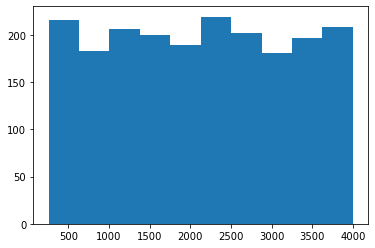

In [16]:
plt.hist(data['ram'])

(array([223., 199., 210., 199., 190., 185., 193., 201., 197., 203.]),
 array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
        1698.6, 1848.3, 1998. ]),
 <BarContainer object of 10 artists>)

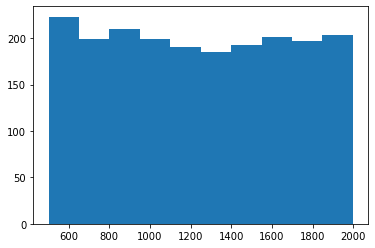

In [17]:
plt.hist(data.battery_power)

<AxesSubplot:>

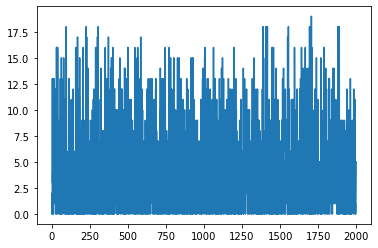

In [18]:
data.front_camera.plot()

<AxesSubplot:>

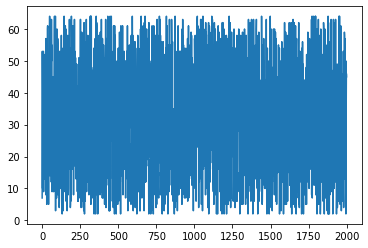

In [19]:
data.internal_memory.plot()

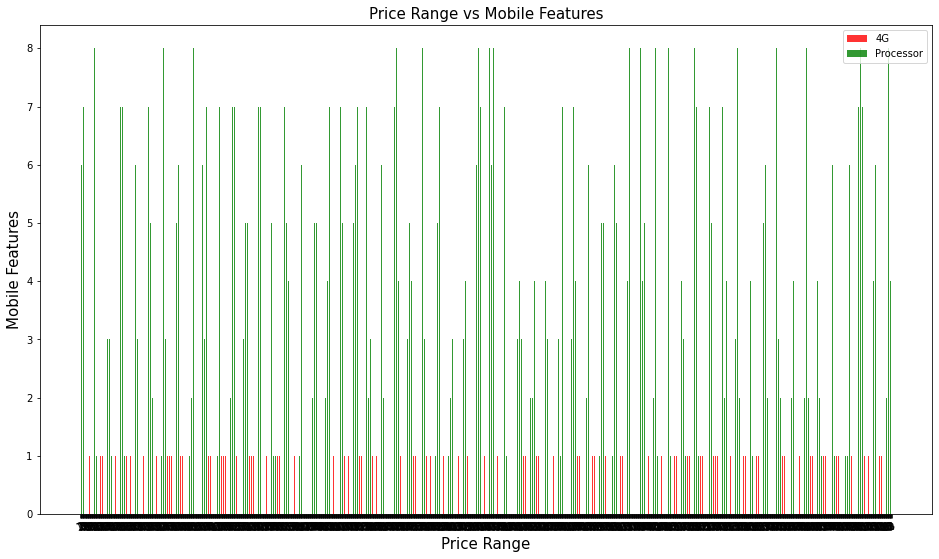

In [20]:
index = np.arange(len(data["price_range"]))
width=0.2
plt.figure(figsize=(16,9))
plt.bar(index, 
        data['Four_G'], 
        width, 
        align='edge', 
        color='r', 
        lw=5, 
        alpha=0.8, 
        ls='-',
        label='4G')

plt.bar(index+width, 
        data.no_cores_processor, 
        width, 
        align='edge', 
        color='g', 
        lw=5, 
        alpha=0.8, 
        ls='-',
        label='Processor')

plt.xticks(index+width,data.price_range,rotation=20)
plt.xlabel('Price Range',fontsize=15)
plt.ylabel('Mobile Features',fontsize=15)
plt.title('Price Range vs Mobile Features',fontsize=15)
plt.legend()
plt.show()

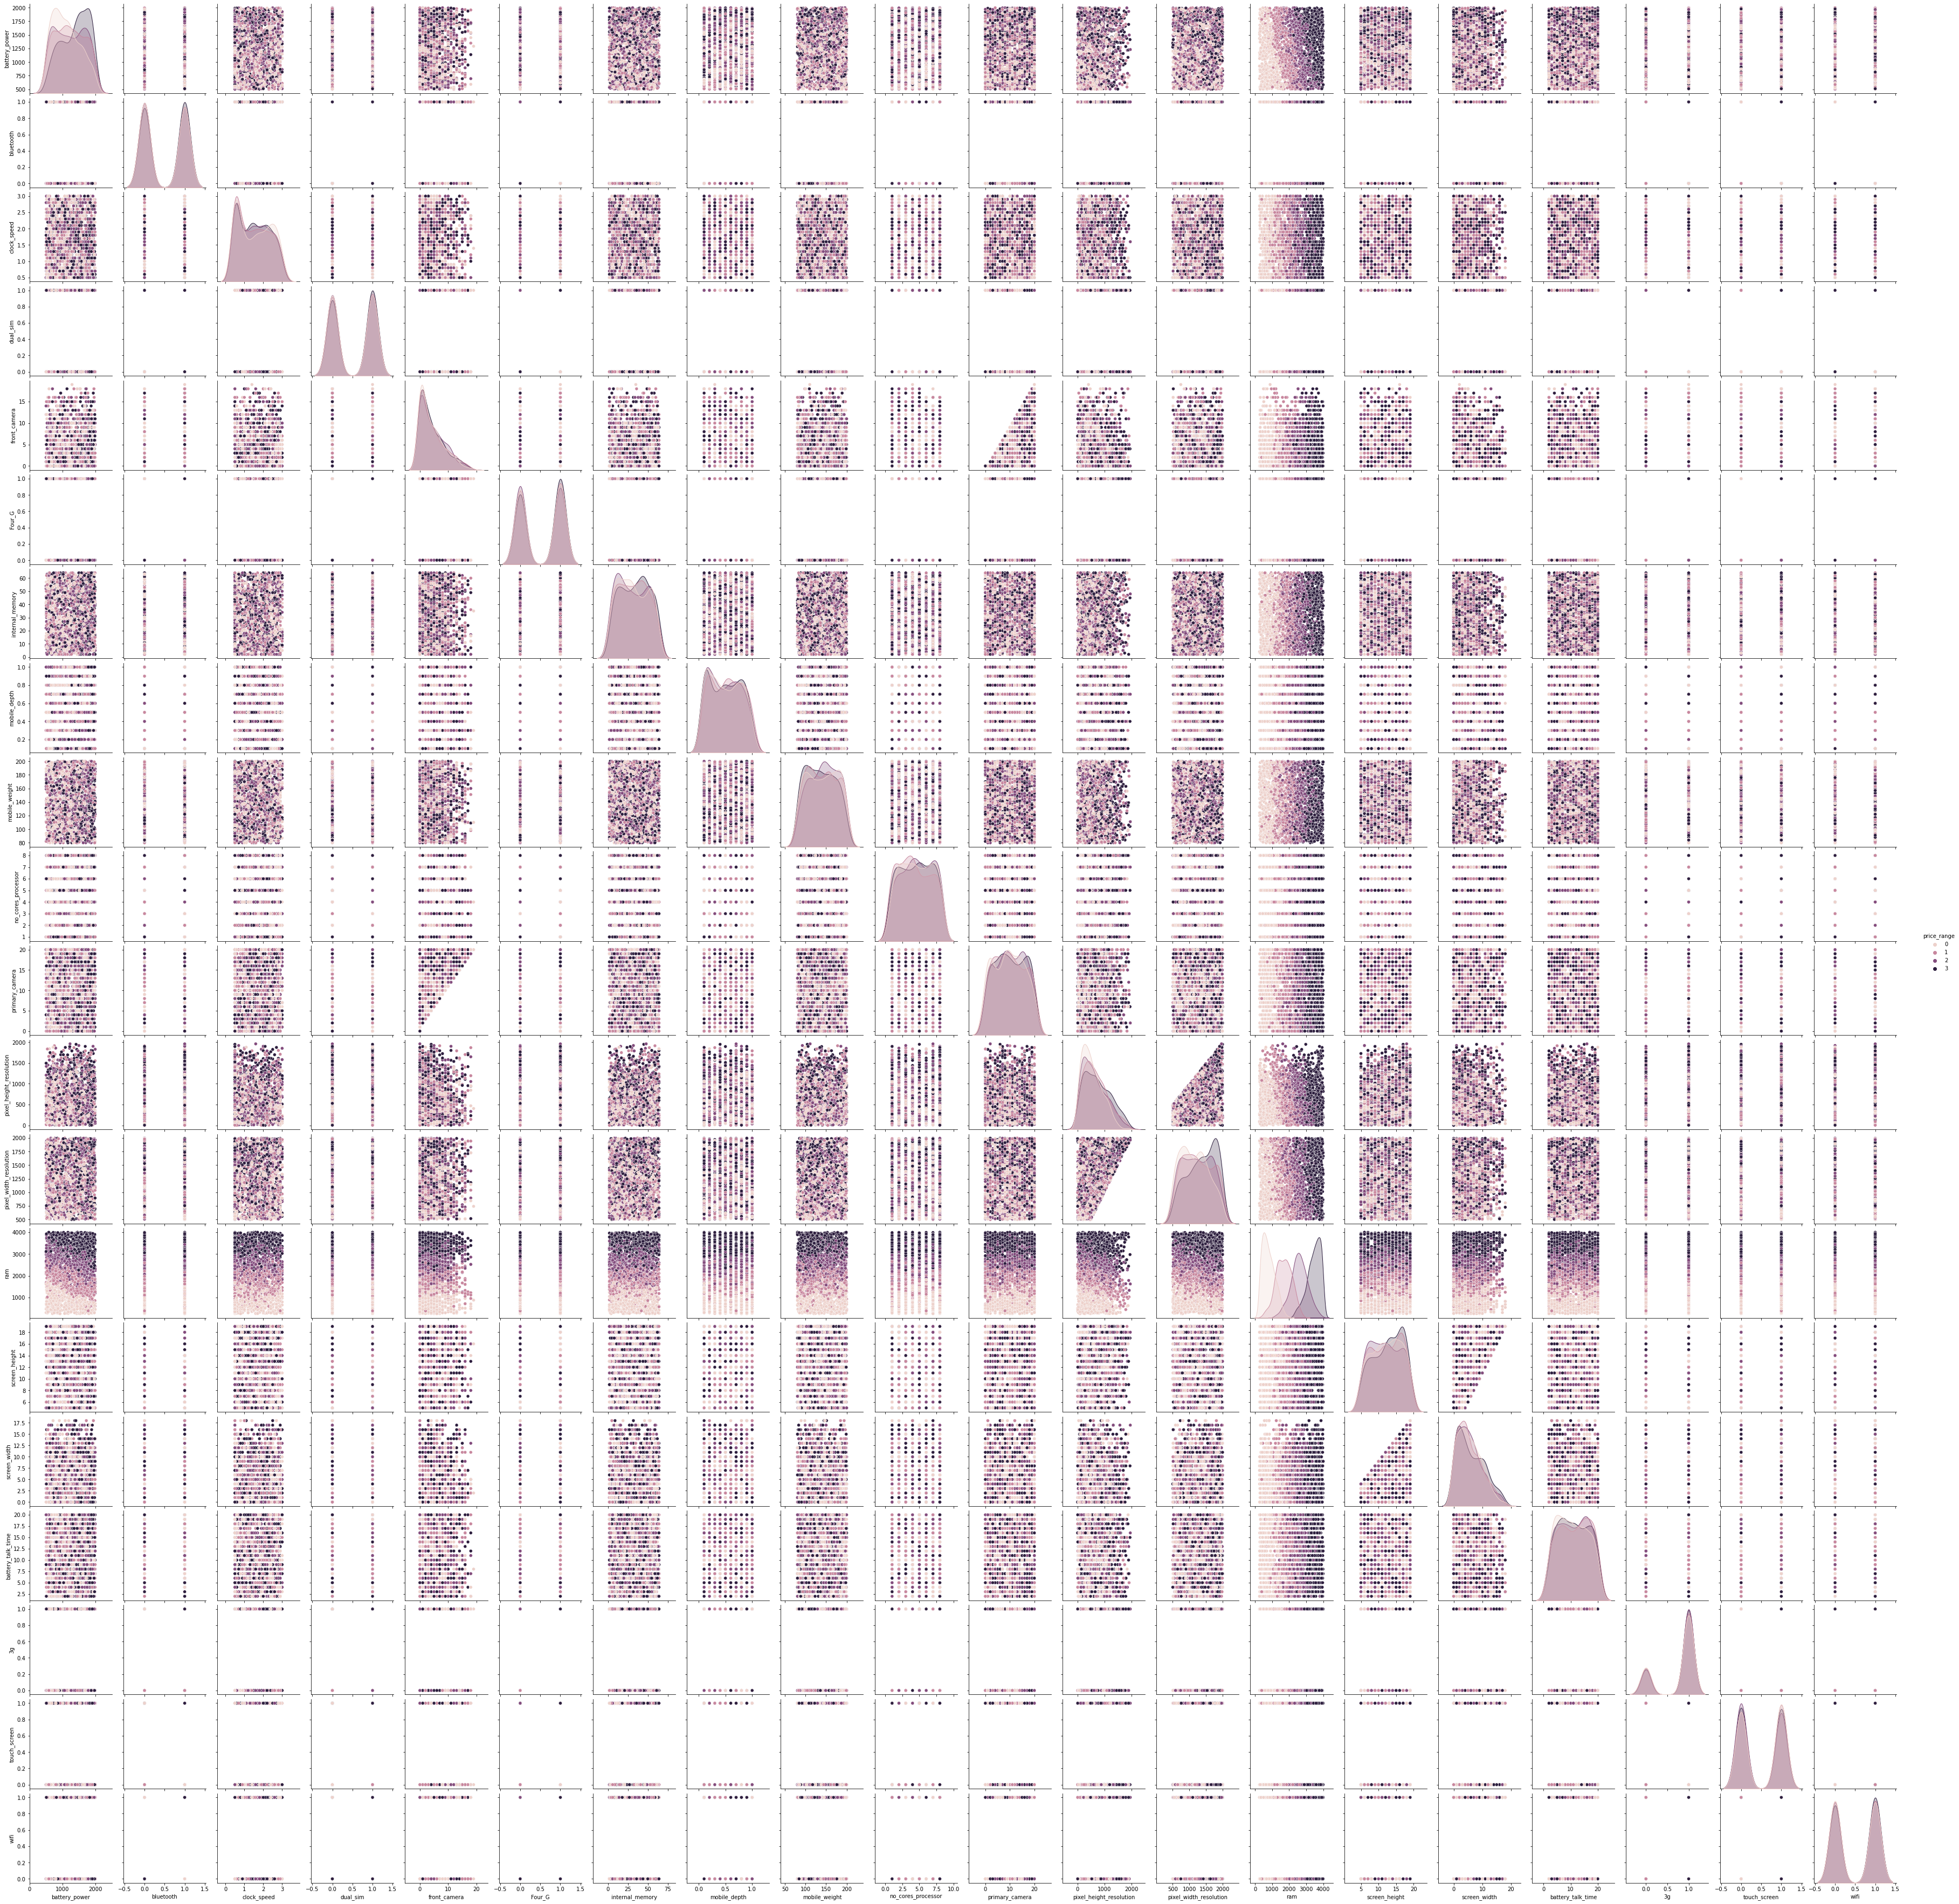

In [21]:
sb.pairplot(data,hue='price_range')

C:\Users\admin\anaconda3\envs\stream\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\envs\stream\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


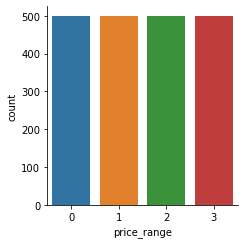

In [22]:
# Checking values for target
sb.catplot('price_range',data=data,kind='count',size = 3.5)

- In terms of class balance, we say that the target(price_range) has balanced classes

### Data Cleaning and Preprocessing:

##### 1. Impuating missing values 

In [23]:
# check missing values 
data.isnull().sum().sum()

0

- Zero Missing Values found in this dataset

##### 2. Converting Categorical Features into Numerical

In [24]:
# check for categorical variable
data_cat = data.select_dtypes(include='object')
data_cat.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

- Categorical features are not present in this dataset

##### 3. Replacing NaN Values With Mean

- Since Zero NaN Values Found in this dataset,
- No Need of any Replacement

##### 4. Check Outlier

In [25]:
# Calculating z_score
z_score=np.abs(stats.zscore(data))
print(z_score)

      battery_power  bluetooth  clock_speed  dual_sim  front_camera    Four_G  \
0          0.902597   0.990050     0.830779  1.019184      0.762495  1.043966   
1          0.495139   1.010051     1.253064  0.981177      0.992890  0.957886   
2          1.537686   1.010051     1.253064  0.981177      0.532099  0.957886   
3          1.419319   1.010051     1.198517  1.019184      0.992890  1.043966   
4          1.325906   1.010051     0.395011  1.019184      2.002254  0.957886   
...             ...        ...          ...       ...           ...       ...   
1995       1.011860   1.010051     1.253064  0.981177      0.992890  0.957886   
1996       1.653694   1.010051     1.321096  0.981177      0.992890  1.043966   
1997       1.530773   0.990050     0.762748  0.981177      0.762495  0.957886   
1998       0.622527   0.990050     0.762748  1.019184      0.071307  0.957886   
1999       1.658331   1.010051     0.585621  0.981177      0.159088  0.957886   

      internal_memory  mobi

In [26]:
# Set threshold
threshold=3

In [27]:
# Detecting Outliers
out = np.where(z_score > threshold)
out

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
        1888], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))

In [28]:
# Create dataframe for Outliers 
outlier = pd.DataFrame(out).T
outlier.columns = ['Row','Column']

In [29]:
# Outliers Dataframe
outlier

Row  Column
0     95       4
1    226       4
2    305       4
3   1387       4
4   1406       4
5   1416       4
6   1554       4
7   1693       4
8   1705       4
9   1880       4
10  1882       4
11  1888       4

In [30]:
# columns in dataset which contains outliers
outlier.Column.value_counts()

4    12
Name: Column, dtype: int64

- Outliers are present at 4 column = 'front_camera'

<AxesSubplot:xlabel='front_camera'>

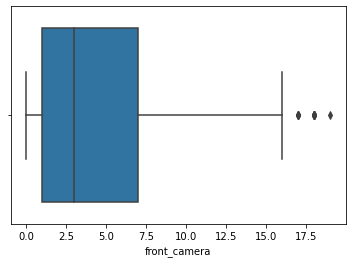

In [31]:
sb.boxplot(x = data['front_camera'])

In [32]:
Q1, Q3 = np.percentile(data["front_camera"],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5*IQR)
upr = Q3 + (1.5*IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",upr)
mea = data["front_camera"].mean()
print("Mean values of front camera = ",mea)

Q1 =  1.0
Q3 =  7.0
IQR =  6.0
Lower Bound =  -8.0
Upper Bound =  16.0
Mean values of front camera =  4.3095


In [33]:
data["front_camera"] = np.where(data["front_camera"] < low, mea, data["front_camera"])
data["front_camera"] = np.where(data["front_camera"] > upr, mea, data["front_camera"])

In [34]:
print(np.where(data["front_camera"] < low))
print(np.where(data["front_camera"] > upr))

(array([], dtype=int64),)
(array([], dtype=int64),)


- Succesfully replaced Outliers with Mean values 

### 5. Features Engg.

##### 5.1. Feature Selection 

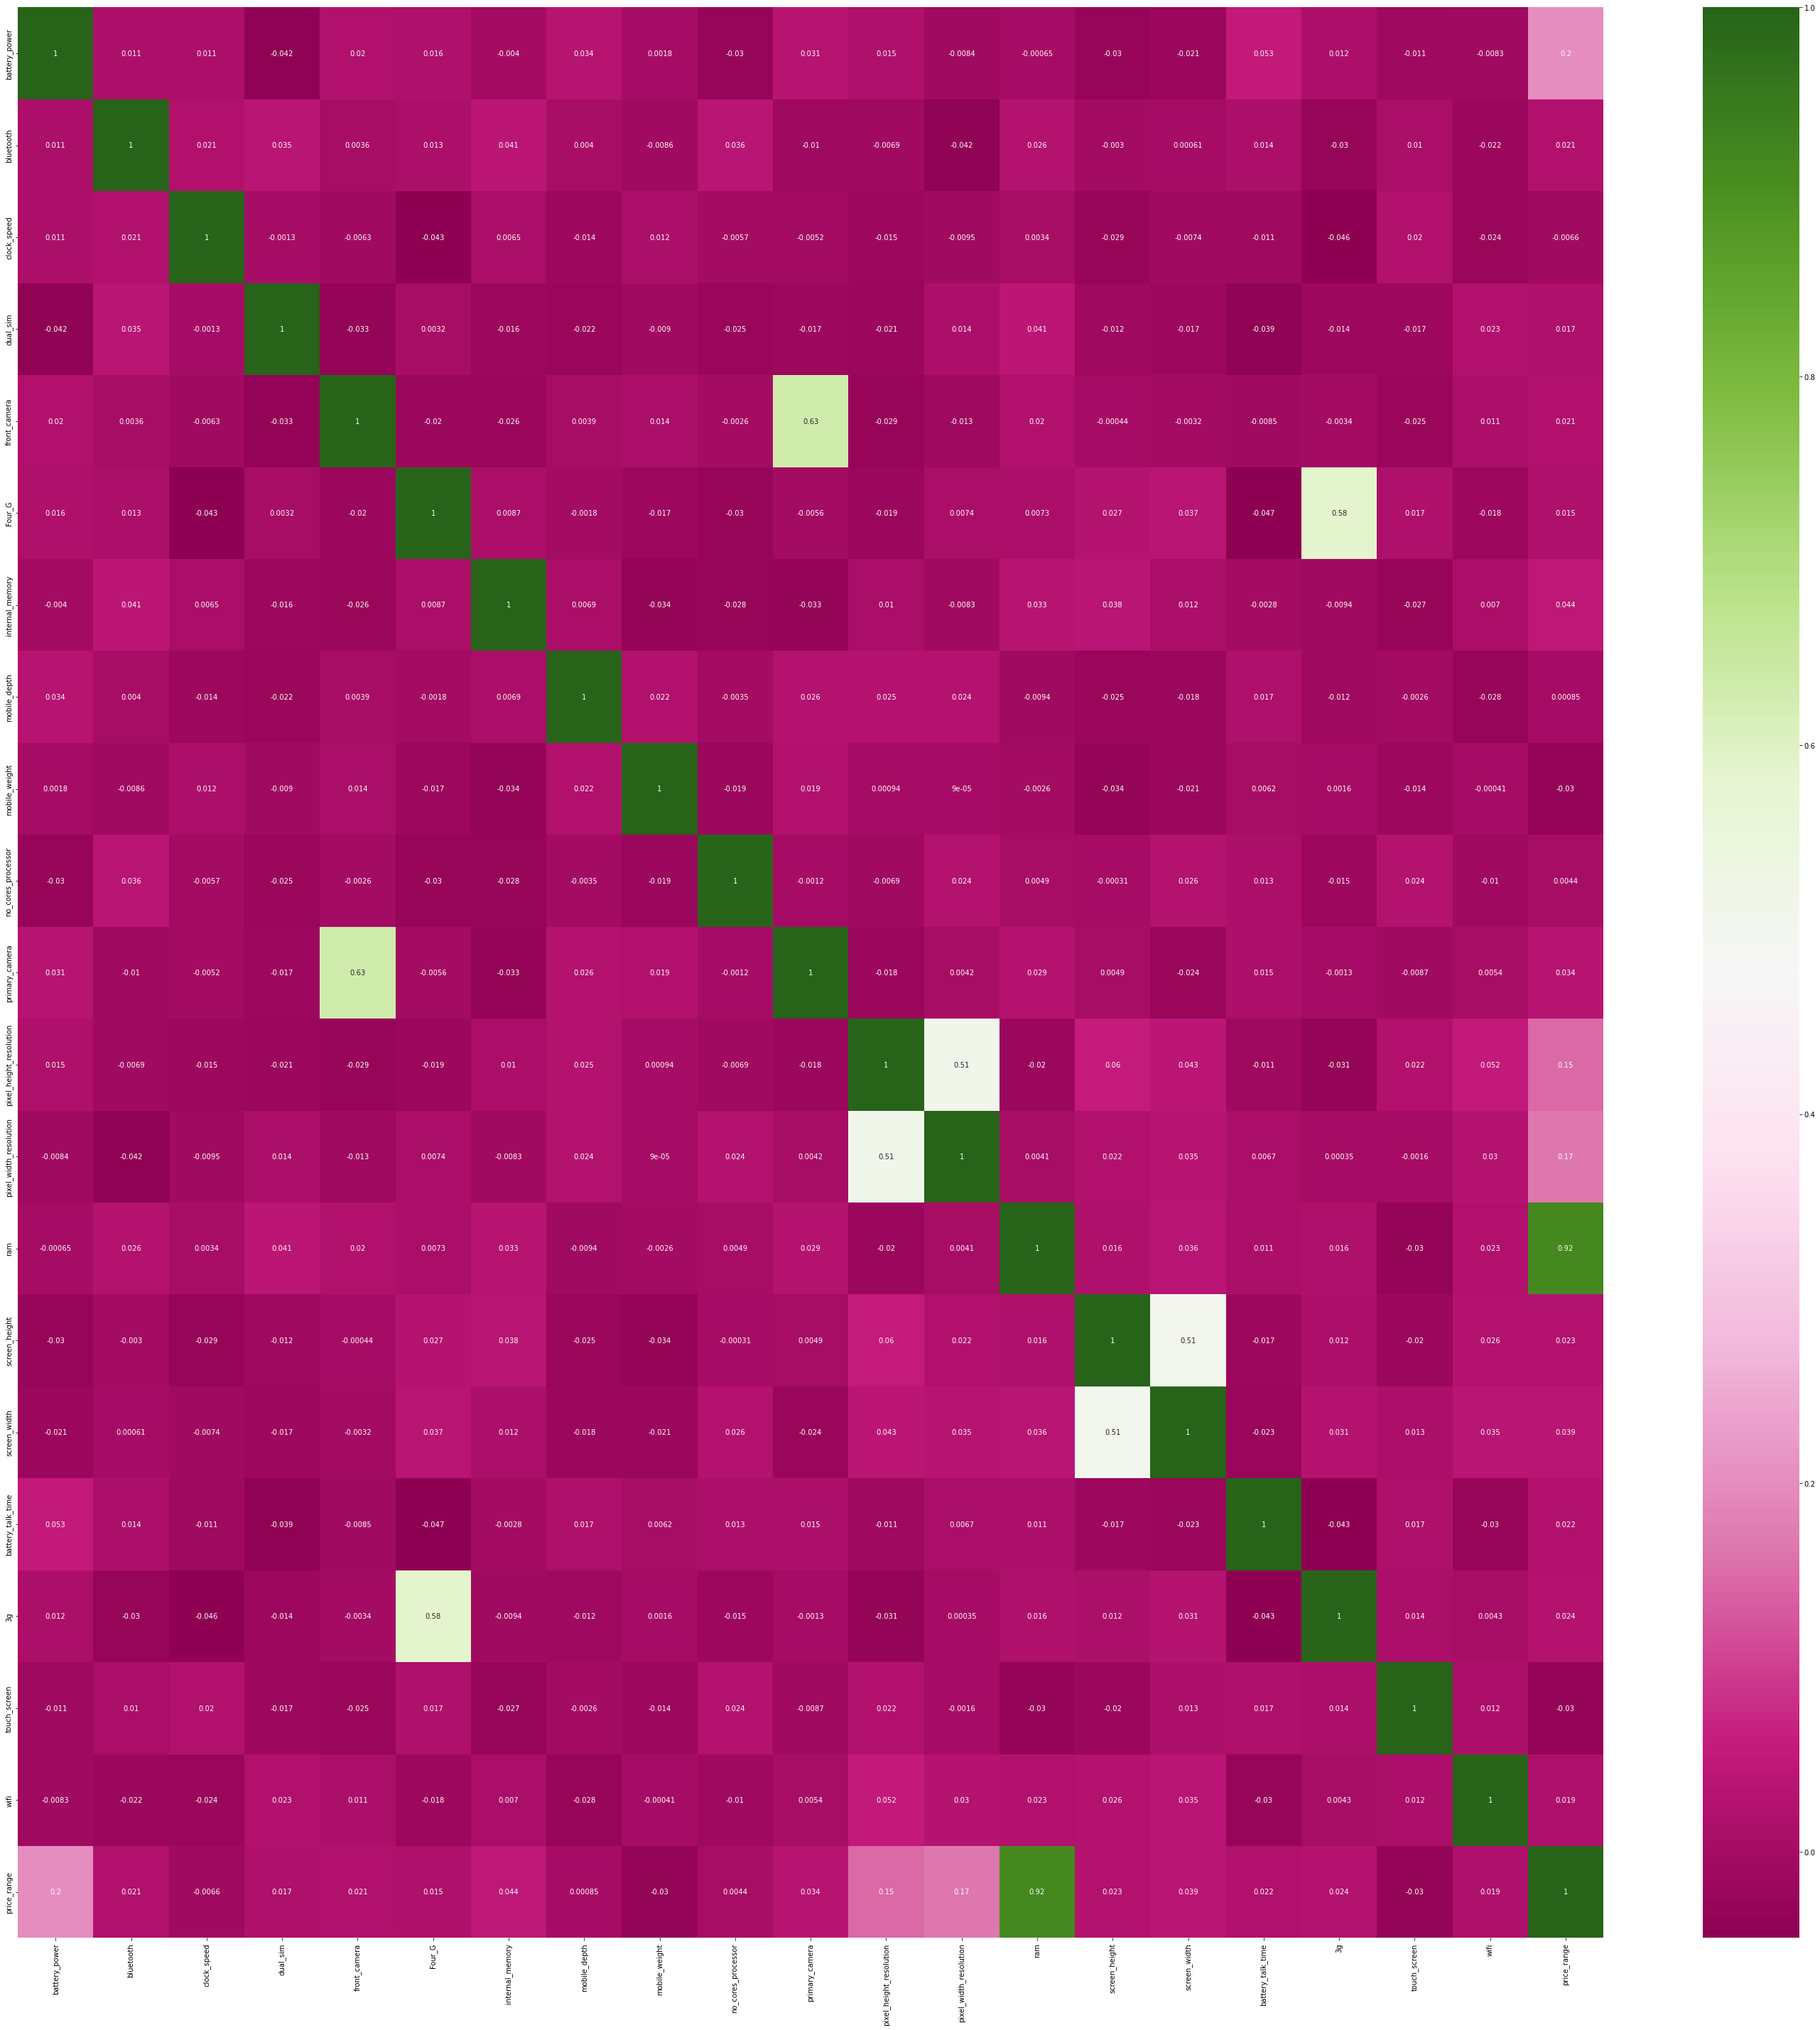

In [35]:
#pearson correlation
corr = data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(50,50))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="PiYG")

- bettery_power, pixel_height_resolution, pixel_width_resolution and ram are highly correlated with price_range
- front_cemara,4g,internal_memory,no_cores_processor,primary_cemara also imp features

##### 2.2. Feature importance :

[0.06109905 0.02007895 0.0339511  0.02038343 0.0326768  0.01795137
 0.03554137 0.03301057 0.03550668 0.03286713 0.03487102 0.04647624
 0.04939626 0.38730414 0.03368944 0.03423778 0.03682682 0.01450582
 0.01970036 0.01992567]


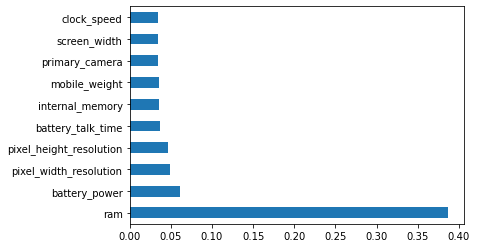

In [36]:
X = data.iloc[:,:-1]  #independent columns
y = data["price_range"]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'Four_G', 'internal_memory', 'mobile_depth', 'mobile_weight',
       'no_cores_processor', 'primary_camera', 'pixel_height_resolution',
       'pixel_width_resolution', 'ram', 'screen_height', 'screen_width',
       'battery_talk_time', '3g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [38]:
# remove less correlated features
data.drop(['bluetooth','clock_speed','dual_sim','mobile_depth','battery_talk_time','3g','touch_screen', 'wifi',],
              axis = 1, inplace= True) 

In [39]:
data.head(5)

battery_power  front_camera  Four_G  internal_memory  mobile_weight  \
0            842           1.0       0                7            188   
1           1021           0.0       1               53            136   
2            563           2.0       1               41            145   
3            615           0.0       0               10            131   
4           1821          13.0       1               44            141   

   no_cores_processor  primary_camera  pixel_height_resolution  \
0                   2               2                       20   
1                   3               6                      905   
2                   5               6                     1263   
3                   6               9                     1216   
4                   2              14                     1208   

   pixel_width_resolution   ram  screen_height  screen_width  price_range  
0                     756  2549              9             7            1  
1                    1988  2631             17             3            2  
2                    1716  2603             11             2            2  
3                    1786  2769             16             8            2  
4                    1212  1411              8             2            1

### Feature Scaling

##### Check Distribution : Noramlization

C:\Users\admin\anaconda3\envs\stream\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

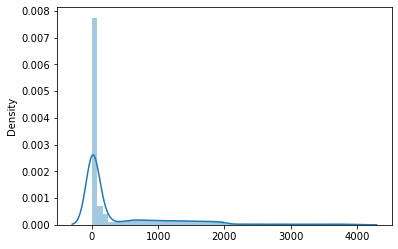

In [40]:
# seaborn displot foe data
sb.distplot(data)

In [41]:
data.columns

Index(['battery_power', 'front_camera', 'Four_G', 'internal_memory',
       'mobile_weight', 'no_cores_processor', 'primary_camera',
       'pixel_height_resolution', 'pixel_width_resolution', 'ram',
       'screen_height', 'screen_width', 'price_range'],
      dtype='object')

In [42]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(data)
feat = scale.transform(data)
n = pd.DataFrame(feat,columns=['battery_power', 'front_camera', 'Four_G', 'internal_memory',
       'mobile_weight', 'no_cores_processor', 'primary_camera',
       'pixel_height_resolution', 'pixel_width_resolution', 'ram',
       'screen_height', 'screen_width', 'price_range'])
n

battery_power  front_camera  Four_G  internal_memory  mobile_weight  \
0          0.227789        0.0625     0.0         0.080645       0.900000   
1          0.347361        0.0000     1.0         0.822581       0.466667   
2          0.041416        0.1250     1.0         0.629032       0.541667   
3          0.076152        0.0000     0.0         0.129032       0.425000   
4          0.881764        0.8125     1.0         0.677419       0.508333   
...             ...           ...     ...              ...            ...   
1995       0.195725        0.0000     1.0         0.000000       0.216667   
1996       0.977956        0.0000     0.0         0.596774       0.891667   
1997       0.941884        0.0625     1.0         0.548387       0.233333   
1998       0.675351        0.2500     1.0         0.709677       0.541667   
1999       0.006012        0.3125     1.0         0.693548       0.733333   

      no_cores_processor  primary_camera  pixel_height_resolution  \
0               0.142857            0.10                 0.010204   
1               0.285714            0.30                 0.461735   
2               0.571429            0.30                 0.644388   
3               0.714286            0.45                 0.620408   
4               0.142857            0.70                 0.616327   
...                  ...             ...                      ...   
1995            0.714286            0.70                 0.623469   
1996            0.428571            0.15                 0.466837   
1997            1.000000            0.15                 0.442857   
1998            0.571429            0.25                 0.171429   
1999            0.714286            0.80                 0.246429   

      pixel_width_resolution       ram  screen_height  screen_width  \
0                   0.170895  0.612774       0.285714      0.388889   
1                   0.993324  0.634687       0.857143      0.166667   
2                   0.811749  0.627205       0.428571      0.111111   
3                   0.858478  0.671566       0.785714      0.444444   
4                   0.475300  0.308658       0.214286      0.111111   
...                      ...       ...            ...           ...   
1995                0.927904  0.110102       0.571429      0.222222   
1996                0.977971  0.474613       0.428571      0.555556   
1997                0.755674  0.748530       0.285714      0.055556   
1998                0.113485  0.163816       0.928571      0.555556   
1999                0.169559  0.978888       1.000000      0.222222   

      price_range  
0        0.333333  
1        0.666667  
2        0.666667  
3        0.666667  
4        0.333333  
...           ...  
1995     0.000000  
1996     0.666667  
1997     1.000000  
1998     0.000000  
1999     1.000000  

[2000 rows x 13 columns]

C:\Users\admin\anaconda3\envs\stream\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

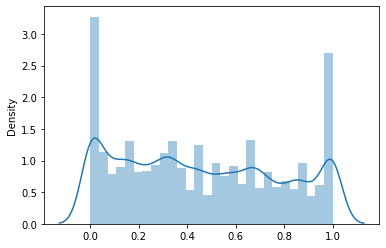

In [43]:
# distribution
sb.distplot(n)

In [44]:
# Skewnwss for dataset
skew = stats.skew(data)
skew

array([ 0.03187454,  0.94924489, -0.08607962,  0.0578459 ,  0.00655324,
        0.00362479,  0.01729317,  0.66577145,  0.01477638,  0.00662306,
       -0.09881006,  0.63331163,  0.        ])

In [45]:
# Kurtosis  for dataset
kurto = stats.kurtosis(data)
kurto

array([-1.22408417,  0.03666996, -1.9925903 , -1.21603447, -1.21035115,
       -1.22967604, -1.1715706 , -0.31807488, -1.18604079, -1.19193387,
       -1.19081485, -0.39154816, -1.36      ])

C:\Users\admin\anaconda3\envs\stream\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

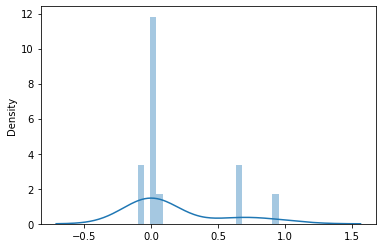

In [46]:
# seaborn plot for skewness for clean data 
sb.distplot(skew)

C:\Users\admin\anaconda3\envs\stream\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

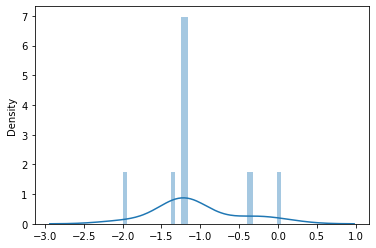

In [47]:
# seaborn plot for kurtosis for clean data
sb.distplot(kurto)

- After Visualize above Plots, The Dataset Is Evenly Distributed

### Defining X and Y

In [48]:
X=data.iloc[:,:-1]
X.head()

battery_power  front_camera  Four_G  internal_memory  mobile_weight  \
0            842           1.0       0                7            188   
1           1021           0.0       1               53            136   
2            563           2.0       1               41            145   
3            615           0.0       0               10            131   
4           1821          13.0       1               44            141   

   no_cores_processor  primary_camera  pixel_height_resolution  \
0                   2               2                       20   
1                   3               6                      905   
2                   5               6                     1263   
3                   6               9                     1216   
4                   2              14                     1208   

   pixel_width_resolution   ram  screen_height  screen_width  
0                     756  2549              9             7  
1                    1988  2631             17             3  
2                    1716  2603             11             2  
3                    1786  2769             16             8  
4                    1212  1411              8             2

In [49]:
y=data.price_range
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

### Splitting the data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [51]:
X_train

battery_power  front_camera  Four_G  internal_memory  mobile_weight  \
1443           1180           0.0       1               27             90   
1126            635           1.0       1               50             97   
729            1135           9.0       0               43            158   
1094            688           0.0       0                2             89   
73             1038           3.0       0               43            141   
...             ...           ...     ...              ...            ...   
1393           1444           0.0       0                6            103   
1344           1429           8.0       0               42            151   
527            1780           6.0       0               27            190   
1149           1396           0.0       1               44            118   
1289            615           7.0       0               58            130   

      no_cores_processor  primary_camera  pixel_height_resolution  \
1443                   6               1                      168   
1126                   5              13                      193   
729                    1              11                      690   
1094                   3               2                      271   
73                     1               5                        4   
...                  ...             ...                      ...   
1393                   1               1                     1274   
1344                   5               9                      670   
527                    4              11                     1331   
1149                   6               1                      173   
1289                   5               8                     1021   

      pixel_width_resolution   ram  screen_height  screen_width  
1443                     540   348              7             5  
1126                     989  2107             13            12  
729                     1589  3204             18            13  
1094                     869   391              5             2  
73                       638  3709             11             0  
...                      ...   ...            ...           ...  
1393                    1340   712             17             5  
1344                    1552  1817              6             1  
527                     1463  2776             19            17  
1149                    1843  1386              7             1  
1289                    1958  1906             14             5  

[1400 rows x 12 columns]

In [52]:
X_test

battery_power  front_camera  Four_G  internal_memory  mobile_weight  \
115            1900           1.0       1               18             89   
1779           1807           0.0       0               16            125   
1449            602           9.0       0               50            141   
145            1814           1.0       1                9            141   
1009           1881           4.0       0               51            158   
...             ...           ...     ...              ...            ...   
1040           1154          12.0       1               14            156   
870            1673           7.0       0                9            187   
1827           1692           4.0       1                2            106   
1533            642           0.0       1               38             86   
1590           1640           1.0       1               36             87   

      no_cores_processor  primary_camera  pixel_height_resolution  \
115                    7               9                     1055   
1779                   3               0                     1221   
1449                   8              18                     1571   
145                    2               2                      756   
1009                   5               7                      477   
...                  ...             ...                      ...   
1040                   7              14                      251   
870                    3              10                       65   
1827                   1              17                     1899   
1533                   5              10                      887   
1590                   8              11                      664   

      pixel_width_resolution   ram  screen_height  screen_width  
115                     1661  2871             12             1  
1779                    1415  2921              8             5  
1449                    1717  2189              7             5  
145                      786  3556             18            12  
1009                    1553  1229             12             0  
...                      ...   ...            ...           ...  
1040                    1801   587              8             3  
870                      734  3669              9             1  
1827                    1904  3779              9             3  
1533                    1775   435              9             2  
1590                    1806  3235              6             1  

[600 rows x 12 columns]

In [53]:
y_train

1443    0
1126    1
729     3
1094    0
73      3
       ..
1393    0
1344    1
527     3
1149    1
1289    1
Name: price_range, Length: 1400, dtype: int64

In [54]:
y_test

115     3
1779    3
1449    2
145     3
1009    1
       ..
1040    0
870     3
1827    3
1533    0
1590    3
Name: price_range, Length: 600, dtype: int64

In [55]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1400, 12)
X_test shape (600, 12)
y_train shape (1400,)
y_test shape (600,)


### Model Selection

##### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

C:\Users\admin\anaconda3\envs\stream\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
accuracy_score(y_test,y_predict)

0.62

In [58]:
confusion_matrix(y_test,y_predict)

array([[110,  29,   1,   0],
       [ 29,  89,  29,  10],
       [  1,  39,  70,  47],
       [  0,   1,  42, 103]], dtype=int64)

##### KNN 

In [59]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
k_model.fit(X_train,y_train)
y_predict = k_model.predict(X_test)

In [60]:
accuracy_score(y_test,y_predict)

0.93

In [61]:
confusion_matrix(y_test,y_predict)

array([[136,   4,   0,   0],
       [  8, 146,   3,   0],
       [  0,   7, 138,  12],
       [  0,   0,   8, 138]], dtype=int64)

##### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_predict = dt_model.predict(X_test)

In [64]:
accuracy_score(y_test,y_predict)

0.835

In [65]:
confusion_matrix(y_test,y_predict)

array([[128,  12,   0,   0],
       [ 18, 127,  12,   0],
       [  0,  21, 112,  24],
       [  0,   0,  12, 134]], dtype=int64)

##### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model.fit(X_train,y_train)
y_predict = rf_model.predict(X_test)

In [67]:
accuracy_score(y_test,y_predict)

0.8833333333333333

In [68]:
confusion_matrix(y_test,y_predict)

array([[133,   7,   0,   0],
       [ 12, 134,  11,   0],
       [  0,  18, 127,  12],
       [  0,   0,  10, 136]], dtype=int64)

- Here, We Select KNN model

### Hyporthesis Data Tuning Using GridSeachCV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
#Choosing a K Value in KNN for price_range:
error_rate = [] 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    knn.score(X_train,y_train)
    predict_i = knn.predict(X_test) 
    error_rate.append(np.mean(predict_i != y_test)) 
  

Text(0, 0.5, 'Error Rate')

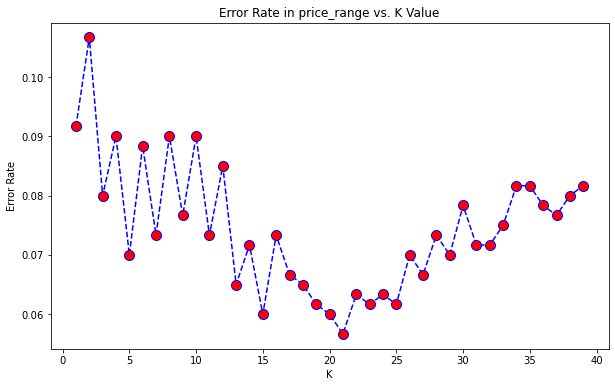

In [71]:
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate in price_range vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')

In [72]:
#data tuning
model = KNeighborsClassifier()
parameters = {'algorithm':['auto'],
                  'leaf_size':[10,15,20,25],
                  'metric':['euclidean'],
                  'metric_params':[None],
                  'n_jobs':[1,3,5],
                  'n_neighbors':[15,18,21,25],
                  'p':[1,2],
                  'weights':['uniform']}

In [73]:
knn_grid = GridSearchCV(model,
                          parameters,
                          cv = 2,
                          verbose=True)

In [74]:
# model fitting
knn_grid.fit(X_train,y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [10, 15, 20, 25],
                         'metric': ['euclidean'], 'metric_params': [None],
                         'n_jobs': [1, 3, 5], 'n_neighbors': [15, 18, 21, 25],
                         'p': [1, 2], 'weights': ['uniform']},
             verbose=True)

In [75]:
# best score
knn_grid.best_score_

0.91

In [76]:
#best parameters
knn_grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

### Creating & Training Model

In [77]:
#creating model
model_knn = KNeighborsClassifier(algorithm='auto',
                                 leaf_size=10,
                                 metric='euclidean',
                                 metric_params=None,
                                 n_jobs=1,
                                 n_neighbors=15,
                                 p=1,
                                 weights='uniform')

In [78]:
#fitting model
model_knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_jobs=1, n_neighbors=15,
                     p=1)

In [79]:
model_knn.score(X_train,y_train)

0.9471428571428572

In [80]:
# accuracy score
y_predict = model_knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.94

### RESULT :
1. Accuracy Score
2. Confusion Matrix
3. Error
4. Precision
5. Recall
6. F1 Score
7. Evaluating Precision, recall,F1 score matrix
8. Roc Auc Score & Curve


##### 1. Accuracy Score

In [81]:
# acuracy score
accuracy_score(y_test,y_predict)

0.94

##### 2. Confusion Matrix

In [82]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({2: 157, 1: 157, 3: 146, 0: 140})


col_0          0    1    2    3
price_range                    
0            137    3    0    0
1              7  148    2    0
2              0    8  141    8
3              0    0    8  138

In [83]:
confusion_matrix(y_test,y_predict)

array([[137,   3,   0,   0],
       [  7, 148,   2,   0],
       [  0,   8, 141,   8],
       [  0,   0,   8, 138]], dtype=int64)

##### 3. Error

In [84]:
# errrors
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.06
0.2449489742783178


##### 4. Precision

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict, average='micro'))

Precision: 0.940


##### 5. Recall

In [86]:
# Recall
print('Recall: %.3f' % recall_score(y_test,y_predict, average='micro'))

Recall: 0.940


##### 6. F1 Score

In [87]:
# F1_score
print('F1_score: %.3f' % f1_score(y_test,y_predict, average='micro'))

F1_score: 0.940


##### 7. Evaluating Precision, recall,F1 score matrix

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       140
           1       0.93      0.94      0.94       157
           2       0.93      0.90      0.92       157
           3       0.95      0.95      0.95       146

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



#### 8.Roc Auc Score & Curve

In [89]:
model_knn.predict(X_test)

array([3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 2, 3, 2,
       0, 1, 0, 0, 3, 3, 1, 1, 2, 0, 3, 2, 2, 2, 1, 0, 2, 0, 3, 2, 2, 0,
       0, 3, 1, 0, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 3, 2, 1, 3, 0, 0, 0, 0, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 3, 2, 1, 2, 2,
       1, 0, 3, 1, 2, 1, 1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, 3, 3,
       3, 1, 2, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 3, 2, 2, 2, 0, 1, 2, 1, 3, 3, 3, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 2, 0, 3, 0, 0, 2, 2, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2,
       0, 1, 1, 2, 2, 3, 0, 3, 2, 1, 0, 3, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1,
       3, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 0, 1, 0, 1,
       3, 0, 0, 1, 1, 0, 2, 3, 2, 1, 3, 0, 0, 3, 1,

In [90]:
model_knn.predict_proba(X_test)

array([[0.        , 0.        , 0.06666667, 0.93333333],
       [0.        , 0.        , 0.06666667, 0.93333333],
       [0.        , 0.13333333, 0.86666667, 0.        ],
       ...,
       [0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [91]:
y_predict_th2 = np.where(model_knn.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model_knn.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model_knn.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [92]:
pd.crosstab(y_test,y_predict_th4)

col_0          0    1
price_range          
0            137    3
1              7  150
2            142   15
3            146    0

In [93]:
def predict_threshold (model_knn,X_test,thresholds):
    import numpy as np
    return np.where(model_knn.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [94]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model_knn,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[ 93  47   0   0]
 [  0 157   0   0]
 [ 90  67   0   0]
 [146   0   0   0]]
Threshold : 0.1
[[103  37   0   0]
 [  0 157   0   0]
 [101  56   0   0]
 [146   0   0   0]]
Threshold : 0.2
[[122  18   0   0]
 [  1 156   0   0]
 [121  36   0   0]
 [146   0   0   0]]
Threshold : 0.30000000000000004
[[129  11   0   0]
 [  3 154   0   0]
 [131  26   0   0]
 [146   0   0   0]]
Threshold : 0.4
[[137   3   0   0]
 [  7 150   0   0]
 [142  15   0   0]
 [146   0   0   0]]
Threshold : 0.5
[[137   3   0   0]
 [  9 148   0   0]
 [149   8   0   0]
 [146   0   0   0]]
Threshold : 0.6000000000000001
[[138   2   0   0]
 [ 28 129   0   0]
 [155   2   0   0]
 [146   0   0   0]]
Threshold : 0.7000000000000001
[[140   0   0   0]
 [ 40 117   0   0]
 [155   2   0   0]
 [146   0   0   0]]
Threshold : 0.8
[[140   0   0   0]
 [ 68  89   0   0]
 [156   1   0   0]
 [146   0   0   0]]
Threshold : 0.9
[[140   0   0   0]
 [ 87  70   0   0]
 [157   0   0   0]
 [146   0   0   0]]
Threshold : 1.0
[[140   

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize

In [96]:
probs = model_knn.predict_proba(X_test)
y_score = probs

In [97]:
y=label_binarize(y, classes=[0,1,2,3])
print(y)

[[0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]]


In [98]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [99]:
for i in range(0,4):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [100]:
print(roc_auc_score)

0.9964697362862833


In [101]:
fpr

{0: array([0.        , 0.        , 0.        , 0.00217391, 0.00217391,
        0.00652174, 0.01086957, 0.01521739, 0.0326087 , 0.03913043,
        0.05      , 0.05434783, 0.08478261, 0.11304348, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.00225734, 0.00451467,
        0.00451467, 0.00902935, 0.01354402, 0.0248307 , 0.04063205,
        0.05869074, 0.08352144, 0.12189616, 0.16478555, 0.20993228,
        0.25733634, 1.        ]),
 2: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00225734, 0.01128668, 0.01580135, 0.02257336, 0.04740406,
        0.06772009, 0.09480813, 0.12866817, 0.15801354, 0.20767494,
        0.28442438, 1.        ]),
 3: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00220264, 0.00440529, 0.01762115, 0.030837  , 0.05066079,
        0.07488987, 0.0814978 , 0.10132159, 0.11894273, 0.14317181,
        1.        ])}

In [102]:
tpr

{0: array([0.        , 0.66428571, 0.73571429, 0.80714286, 0.87142857,
        0.92142857, 0.97857143, 0.97857143, 0.97857143, 0.98571429,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 1: array([0.        , 0.24203822, 0.44585987, 0.56687898, 0.68152866,
        0.74522293, 0.82165605, 0.85987261, 0.94267516, 0.95541401,
        0.96178344, 0.98089172, 0.99363057, 0.99363057, 1.        ,
        1.        , 1.        ]),
 2: array([0.        , 0.18471338, 0.30573248, 0.39490446, 0.52229299,
        0.61783439, 0.73248408, 0.81528662, 0.89808917, 0.94904459,
        0.97452229, 0.98089172, 0.98726115, 0.99363057, 1.        ,
        1.        , 1.        ]),
 3: array([0.        , 0.63013699, 0.68493151, 0.75342466, 0.7739726 ,
        0.82876712, 0.8630137 , 0.94520548, 0.96575342, 0.97945205,
        0.99315068, 1.        , 1.        , 1.        , 1.        ,
        1.        ])}

In [103]:
threshold

{0: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.6       , 0.53333333, 0.46666667, 0.4       ,
        0.33333333, 0.26666667, 0.13333333, 0.06666667, 0.        ]),
 1: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ]),
 2: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ]),
 3: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.53333333, 0.46666667, 0.4       ,
        0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
        0.        ])}

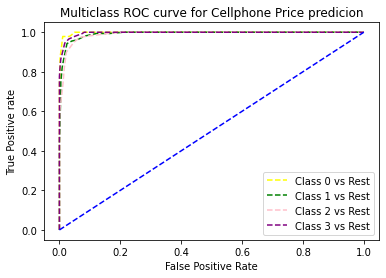

In [104]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest') 
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for Cellphone Price predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);     


##### We predicted Cell phone price with 94% accuracy.

##### Saving Model to disk

In [105]:
import pickle

In [106]:
pickle_out = open("cell_classifier.pkl","wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

##### Predicting model

In [107]:
print(model_knn.predict([[1911,1,1,36,108,8,3,868,1632,3057,9,1]]))

[3]


C:\Users\admin\anaconda3\envs\stream\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [108]:
print(model_knn.predict([[842,1,0,7,188,2,2,20,756,2549,9,7]]))

[1]


C:\Users\admin\anaconda3\envs\stream\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
